In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_helper_calc 
from matplotlib import pyplot as plt

In [3]:
df_train = pd.read_csv('./data/fen_train.csv')
df_test = pd.read_csv('./data/fen_test.csv')

df_train.head(3)

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0


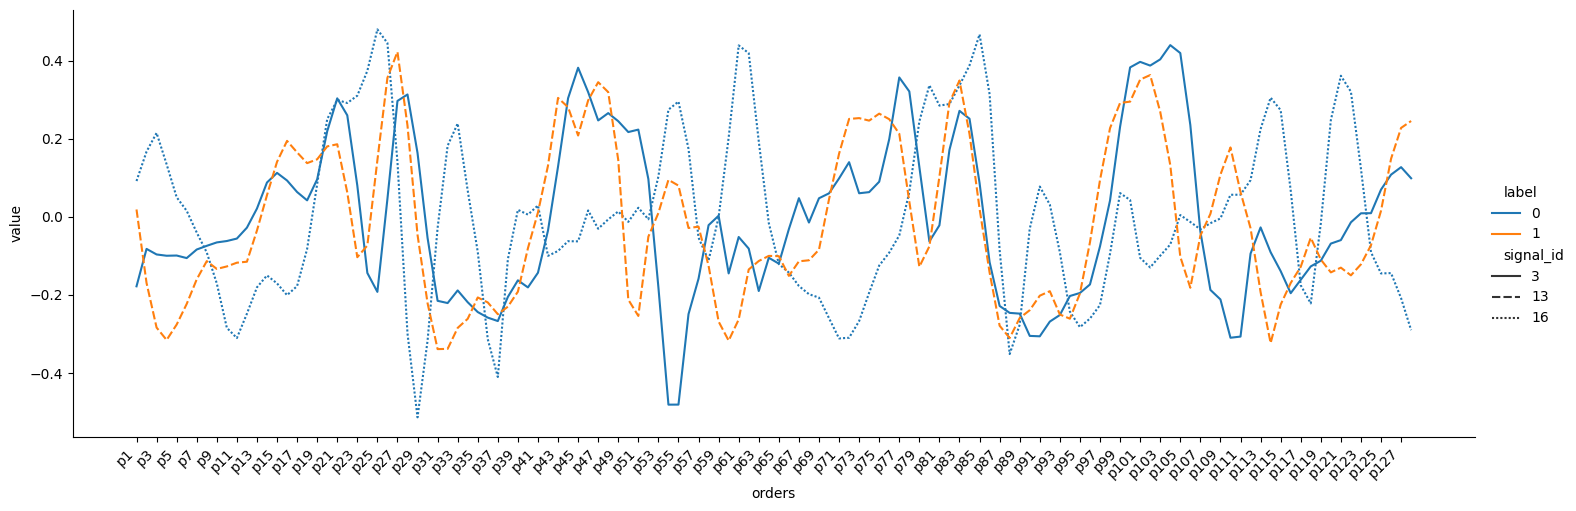

In [4]:
df_melt = df_train.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(df_train[["signal_id", "label"]], on="signal_id", how="left")

# Отбираем несколько примеров разных классов
tmp = df_melt[df_melt.signal_id.isin([3, 13, 16])]

# Строим графику
sns.relplot(
    data=tmp,
    x="orders",
    y="value",
    hue="label",
    style="signal_id",
    kind="line",
    aspect=3,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [5]:
tmp = dff[dff.signal_id.isin([3, 13, 16])]

sns.relplot(
    data=tmp,
    x='orders',
    y='grad',
    hue='label',
    aspect=3,
    kind='line'
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

NameError: name 'dff' is not defined

  0%|          | 116/24538 [02:46<9:42:59,  1.43s/it] 


KeyboardInterrupt: 

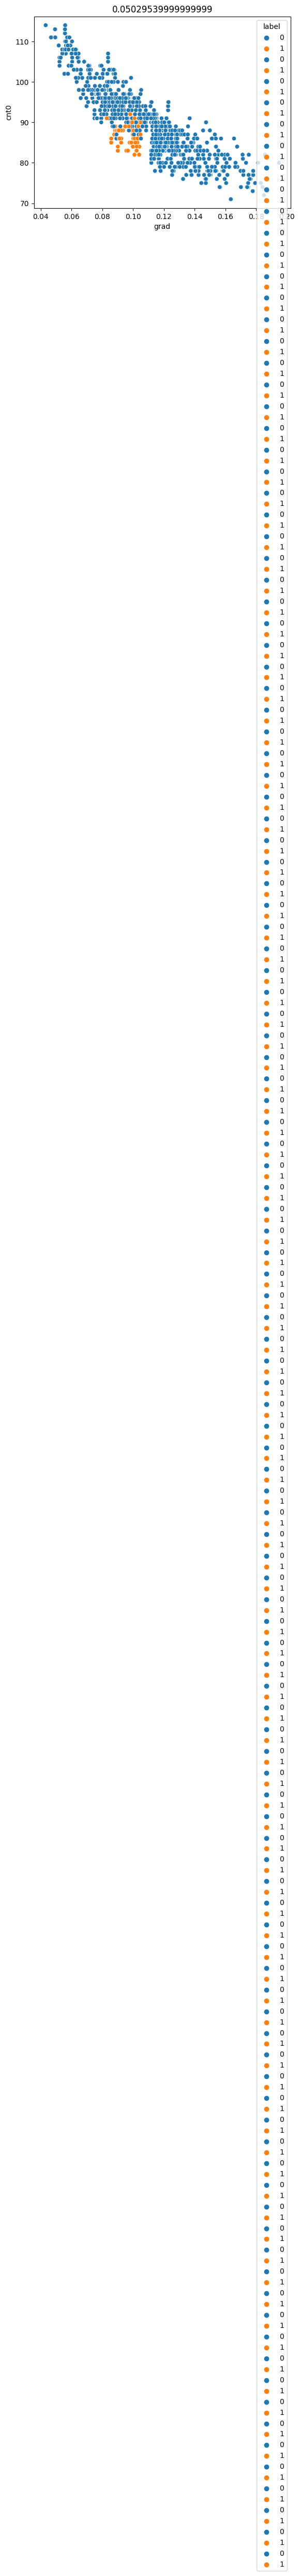

In [44]:
from time import sleep
from tqdm import tqdm

dff = df_melt.copy(True)
dff['grad'] = dff.groupby('signal_id', group_keys=False).value.transform(lambda x: x.diff())
dff.query('signal_id == 5')

ex = (dff.groupby('signal_id').grad.std()).reset_index().merge(df_train[['signal_id', 'label']], on='signal_id')


for i in tqdm(range(len(vals))):
    k = vals[i]

    ex['cnt0'] = dff.groupby('signal_id', group_keys=True).grad.apply(lambda x: np.sum(x < k)).values

   #g = sns.scatterplot(
        data=ex,
        x='grad',
        y='cnt0',
        hue='label',
        
    )
    g.set_title(f'{vals[i]}')
    g.get_figure().savefig(f'./data/{i}.png')
    #lt.show()
    

In [25]:
dff

,signal_id,orders,value,label,grad
0,3,p1,-0.177789,0,NaN
1,4,p1,0.010337,0,NaN
2,5,p1,-0.221846,0,NaN
3,6,p1,0.411835,0,NaN
4,7,p1,0.221770,0,NaN
...,...,...,...,...,...
83707,1214,p128,0.104189,0,0.086233
83708,1218,p128,0.033331,0,0.005525
83709,1219,p128,0.021913,0,0.037128
83710,1221,p128,0.522160,0,0.341739


In [40]:
vals = dff.grad.dropna().sort_values().values
vals = vals[vals > 0.05]

In [776]:
df_test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.138940,0.256082,0.344688,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.187563,0.234320,0.270503,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.368040,0.290899,0.207095,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.127023,0.275310,0.192306,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,-0.202586,0.001186,0.190594,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.432804,0.430316,0.360257,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,0.460892,0.331173,-0.004532,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.123037,-0.088129,-0.046241,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.038111,-0.028967,-0.025562,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029
